> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Medical Appointment: Wrangling, EDA, Visualization]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Medical Appointment dataset contains over 100,000 medical appointents, information on patients and whether or not they will show up after booking for an appointment.


### Question(s) for Analysis
1. Which gender is likely to show up for an appointment?

2. Does age affect a patient showing up for an appointment?

3. Did patients who got the scholarship show up?

4. Does receiving SMS increae the chances of patient showing up?


## Data Wrangling

### Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

### Load dataset 

In [24]:
df = pd.read_csv("data/KaggleV2-May-2016.csv")

In [25]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
df.shape

(110527, 14)

There are 110,527  rows and 14 columns in the dataset

### Inspecting Dataset

In [27]:
# inspecting dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 Summary from the above dataset
* There are no missing values.
* The patientId and AppointmentID are in  float and int respectively; they should be in string.
* ScheduleDay and AppointmentDay are in string; they should be in datetime.

In [28]:
# checking for duplicated
sum(df.duplicated())

0

No duplicated value in the dataset


## Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

1. Convert column names to lower case
2. Change datatypes: 
* PaitentId (float ) to string
* AppointmentID (int) to string
* ScheduleDay (string) to date
* AppointmentDay (string) to date
* no-show (string) to int and convert it to binary (0,1)
3. Constraint the ages to 0 to 100
4. Rename "hipertension", "handcap" and "no-show"

Converting headings to lowercase

In [29]:
df.columns = df.columns.str.lower()
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Converting patientid and appointmentid to strings

In [30]:
df['patientid'] = df['patientid'].astype(str)

In [31]:
df['appointmentid'] = df['appointmentid'].astype(str)

Renaming hipertension and handcap, patientid, appointmentid, scheduleday, appointmentday and no-show

In [32]:


df.columns = ['patient_id', "appointment_id", 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [33]:
df['handicap'].nunique()

5

There are five unque values in handicap. However, 0 and 1 consist 98% while 2 to 5 consist the remaining 2%. 
So handicap would be converted to binary.

Converting handicap to binary

In [34]:
df['handicap'] = df['handicap'].apply(lambda x: 0 if x == 0 else 1)

Changing scheduled_day and appointment_day to datetime

In [35]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.strftime('%Y-%m-%d')

df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.strftime('%Y-%m-%d')
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


Converting no_show to binary

In [36]:
df.no_show.replace(to_replace=['yes', 'no'], value=[0,1])
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


Drop ages less than 0 and ages greater than the agelimit

In [37]:
df.drop(df[df['age'] < 0].index, inplace=True)
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question

1. Which gender is more likely to show up for appointment?


In [38]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of patients (Male & Female):')

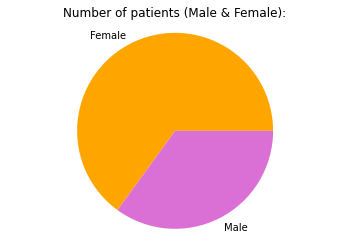

In [39]:
plt.pie([71839, 38687], labels=['Female', 'Male'], colors=['orange', 'orchid'])
plt.axis('equal')
plt.title("Number of patients (Male & Female):")

According to the pie chart, more females booked medical appointment than males.

### Research Question 2 

2. Does age affect patient showing up for an appointment?

In [40]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Group patients into range of ages

In [41]:
bin_ranges = [0, 20, 40, 60, 80, 115]

#label bins
bin_labels = ['<20', '20-39', '40-59', '60-79', '80-115']

# Create 'age_group' column
df['age_group'] = pd.cut(df['age'], bin_ranges, labels=bin_labels, right=False, include_lowest=True)
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-79
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,40-59
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-79
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<20
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,40-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,40-59
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,40-59
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,20-39
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,20-39


Ages of patients that showed up in each age group

In [42]:
age_groupings = df.groupby(['age_group', 'no_show']).count()['age']
age_groupings

age_group  no_show
<20        No         23670
           Yes         6741
20-39      No         22190
           Yes         6680
40-59      No         24416
           Yes         5656
60-79      No         15118
           Yes         2692
80-115     No          2811
           Yes          547
Name: age, dtype: int64

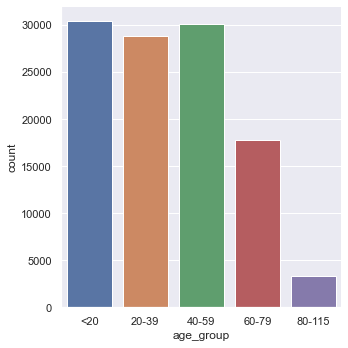

In [60]:
# Explore Age Groupdistribution

sns.catplot(x="age_group", kind="count", data=df)

Patients under the ages of 20 years booked appointment the most, while patients within the ages of 80 and 115 booked few appointment

## Research Question 3

### Did patients who got the scholarship show up?

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-79
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,40-59
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-79
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<20
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,40-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,40-59
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,40-59
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,20-39
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,20-39


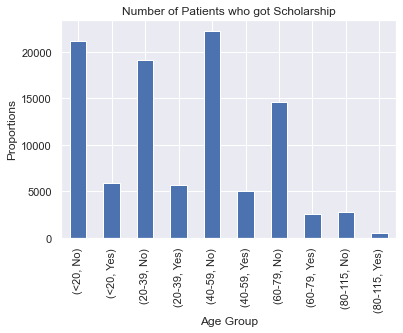

In [56]:
df[df['scholarship']==0].groupby(df['age_group'])['no_show'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel("Proportions")
plt.title("Number of Patients who got Scholarship")
df

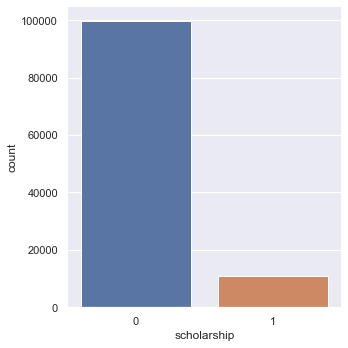

In [65]:
sns.catplot(x="scholarship", kind="count", data=df)

Number of patients who didn't show up after receiving scholarship for free medical appointment are larger than those who didn't receive any scholarship

## Research Question 4

### Does receiving SMS increase the chances of patient showing up?

In [ ]:
sms_counts = df.groupby(['sms_received', 'no_show']).count()['age']
sms_counts

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64

In [ ]:
# fraction of patients who received sms and did not show up
sms_show_up_0 = sms_counts[0, 'No'] / df['sms_received'].value_counts()[0]
sms_show_up_0

0.8329646607323703

In [ ]:
# fraction of patients who received sms and did not show up

sms_show_up_1 = sms_counts[1, 'No']  / df['sms_received'].value_counts()[1]
sms_show_up_1

0.7242545516036301

Text(0.5, 1.0, 'Proportion of Patients who showed Up: SMS or No SMS')

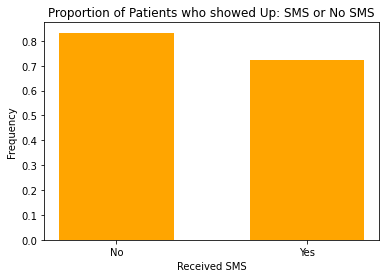

In [ ]:
# plotting bar graph

plt.bar([1,2], [sms_show_up_0, sms_show_up_1], width=0.6, color=['orange'])
plt.xlabel('Received SMS')
plt.ylabel('Frequency')
plt.xticks([1,2], ['No', 'Yes'])
plt.title("Proportion of Patients who showed Up: SMS or No SMS")

From the chart, it appears that the proportion of patients that showed up  after receiving SMS are less than those that did not received notification.

<a id='conclusions'></a>
## Conclusions

After conducting EDA, the likelihood of patient showing up for appointment were dependent on:
* Age
* Scholarship
* SMS
* Gender

Surprisingly, the number of patients who received the Scholarship did not show up for the medical appointment.

Limitations

* Some of the ages are less than 0.
* Ages contain outliers.
* Some of the appointment days come before the schedule days.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/home/eben-success/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/eben-success/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/eben-success/anaconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/home/eben-success/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/eben-success/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/eben-success/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/home/eben-success/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 529, in conve

1